# Color Manipulation

#### Explanation

Goals:
1. Be able to split an image to its RGB channels and then merge back to original images
2. Experiment how colormaps change images
3. Experiment with how merge order affects image.

#### The libraries used:

In [1]:
%matplotlib inline

import cv2
import sys
from matplotlib import pyplot as plt #plot
from matplotlib import colors as mcolors
from matplotlib import image as mpimg
from matplotlib import colors as LightSource

import numpy as np
import numpy.ma as ma
import matplotlib
import numpy as pillow
from PIL import Image #Python Imaging Library(PIL) and is python image format
from skimage.io import imread



## Original Image

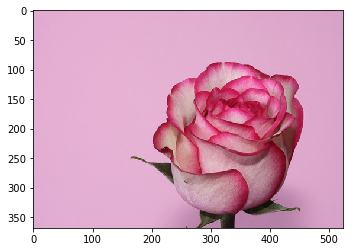

In [2]:
image = imread('rose.jpg');
plt.imshow(image)


#### An image is composed of RGB values, where values are coerced to integers from 0 to 255. 

## No colormap. 

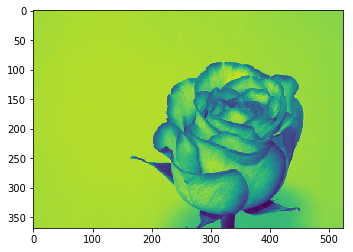

In [3]:
image = plt.imread('rose.jpg');
plt.imshow(image)
def ImgHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    # assign channel
    Hue = 0.33*R + 0.333*G + 0.33*B
    
    return Hue
HueImg = ImgHue(image);
plt.imshow(HueImg, cmap = None,  alpha = 1)
plt.savefig('HueRose.png')

#### ImgHue gives a matrix of scalars. In a real world, it should be a matrix of tuples. A colormap must be assigned to each scalar to create a RGB tuple.

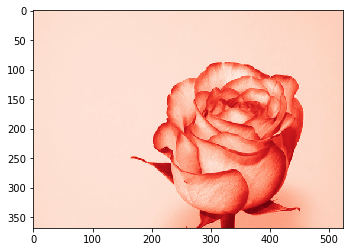

In [4]:
def RedHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    red = 0.3*R + 0.3*G + 0.3*B 
    #although it looks nicer and more full in color
    #this is not just pure red from the image. 
    #There are greens and blues tinted red from the matrix multiplications.
    
    return red
RedImg = RedHue(image);
plt.imshow(RedImg, cmap = plt.cm.Reds_r, alpha = 1)
plt.savefig('RedRose.png')

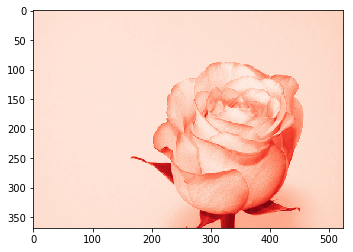

In [5]:
def RedHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    red = 1*R + 0*G + 0*B
    
    return red
RedImg = RedHue(image);
plt.imshow(RedImg, cmap = plt.cm.Reds_r, alpha = 1)
plt.savefig('RedRose.png')

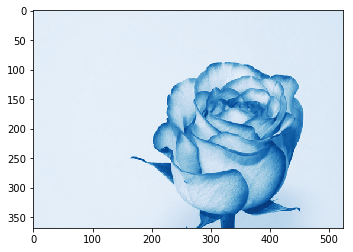

In [6]:
def BlueHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    blue = 0*R + 0*G + 1*B
    
    return blue
BlueImg = BlueHue(image);
plt.imshow(BlueImg, cmap = plt.cm.Blues_r, alpha = 1)
plt.savefig('BlueRose.png')

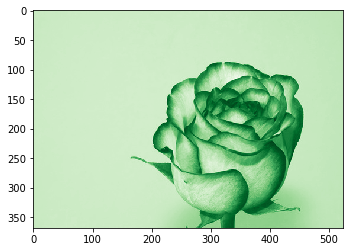

In [7]:
def GreenHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    green = 0*R + 1*G + 0*B
    
    return green
GreenImg = GreenHue(image);
plt.imshow(GreenImg, cmap = plt.cm.Greens_r, alpha = 1)
plt.savefig('GreenRose.png')

#### Other colormaps may also be used such as purple and orange. There are more selections on the matplotlib.org page on colormaps. 

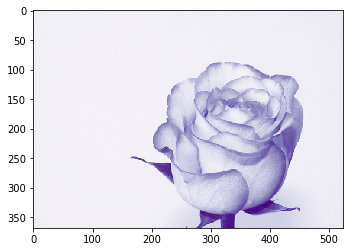

In [8]:
def PurpleHue (rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    purple = 0.5*R + 0*G + 0.5*B
    
    
    return purple
PurpleImg = PurpleHue(image);
plt.imshow(PurpleImg, cmap = plt.cm.Purples_r,  alpha = 1)
plt.savefig('PurpleRose.png')

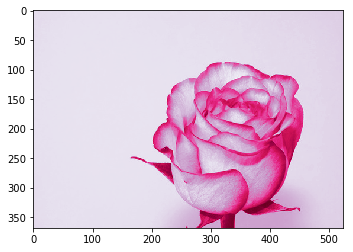

In [9]:
def PuRdHue (rgb): #Purple Red Hue
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    PuRd = 0.3*R + 0.3*G + 0.3*B
    
    
    return PuRd
PuRdImg = PuRdHue(image);
plt.imshow(PuRdImg, cmap = plt.cm.PuRd_r,  alpha = 1)
plt.savefig('PuRdRose.png')

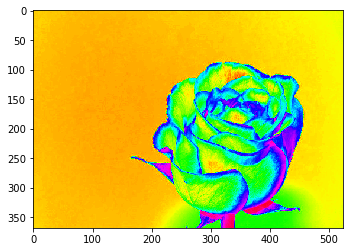

In [10]:
def HSVHue (rgb): #HSV Cyclic Color Map
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    HSV = 0.3*R + 0.3*G + 0.3*B
    
    
    return HSV
HSVImg = HSVHue(image);
plt.imshow(HSVImg, cmap = plt.cm.hsv_r,  alpha = 1)
plt.savefig('HSVRose.png')

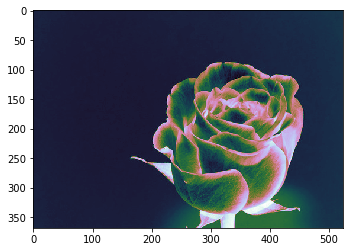

In [11]:
def CubeHelixHue (rgb): #Cube Helix Color Map
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    CubeHelix = 0.3*R + 0.3*G + 0.3*B
    
    
    return CubeHelix
CubeHelixImg = CubeHelixHue(image);
plt.imshow(CubeHelixImg, cmap = plt.cm.cubehelix_r,  alpha = 1)
plt.savefig('CubeHelixRose.png')

## Trying to put the images back to the original image

#### At first I tried to put the transparency to about 1/3 so the layers could be seen. Alpha controls the transparency. If Alpha = 1, then the last plt.imshow would only show the last image because it'd cover the rest because it's not transparent.

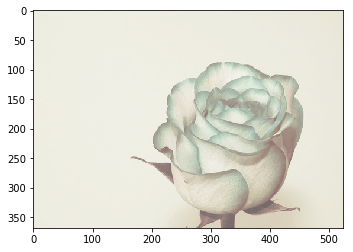

In [12]:
plt.imshow(BlueImg, cmap = plt.cm.Blues_r, alpha = 0.33)
plt.imshow(GreenImg, cmap = plt.cm.Greens_r, alpha = 0.33)
plt.imshow(RedImg, cmap = plt.cm.Reds_r, alpha = 0.33)

#### You can tell that the image is not the original image. Thus I did some research and found how to merge images back. There was confusion over how the order of RGB works.  
### Color image loaded by OpenCV is in BGR mode. 
### Matplotlib displays in RGB mode. 
#### Thus, I experimented with cv2.color_Lab2RGB and cv2.color_Lab2BGR. Neither looked like the original image.

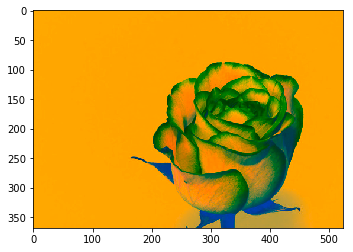

In [13]:
merged_channels = cv2.merge((BlueImg,GreenImg,RedImg))
final_image = cv2.cvtColor(merged_channels,cv2.COLOR_LAB2RGB)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-BGR-RGB-Rose.png')

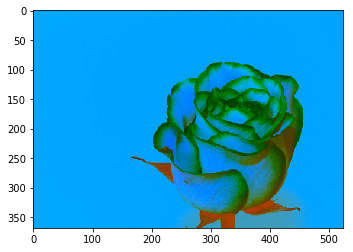

In [14]:
merged_channels = cv2.merge((BlueImg,GreenImg,RedImg))
final_image = cv2.cvtColor(merged_channels,cv2.COLOR_LAB2BGR)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-BGR-BGR-Rose.png')

#### Then I was curious about whether the order of GreenImg,BlueImg, and RedImg mattered. It turns out it did.

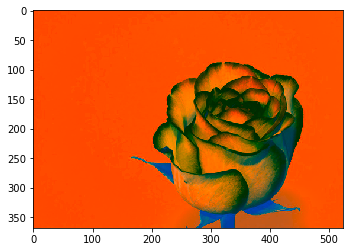

In [15]:
merged_channels = cv2.merge((GreenImg,BlueImg,RedImg))
final_image = cv2.cvtColor(merged_channels,cv2.COLOR_LAB2RGB)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-GBR-RGB-Rose.png')

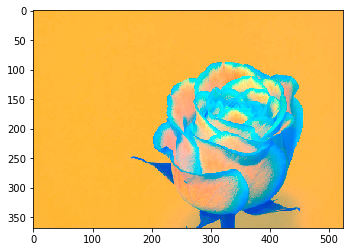

In [16]:
merged_channels = cv2.merge((RedImg,GreenImg,BlueImg))
final_image = cv2.cvtColor(merged_channels,cv2.COLOR_LAB2RGB)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-RGB-RGB-Rose.png')

#### Finally I got curious whether the cv2.color_lab2RGB was necessary so I put a zero as it would have no flag. It looked a lot closer to our original image. In fact, I was stunned that it looked as if we had digital foodcoloring added to the flower. Since we've determined ordered matter in the merge function, we've tested out other orders.

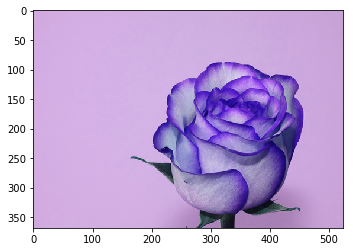

In [17]:
merged_channels = cv2.merge((BlueImg,GreenImg,RedImg))
final_image = cv2.cvtColor(merged_channels, 0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-Purple-0-Rose.png')

## Matching the Original Image

### Merge Image Outcome is below.

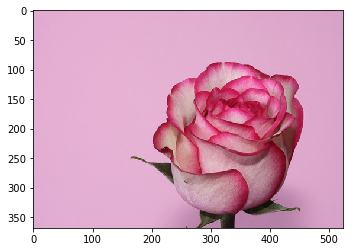

In [18]:
merged_channels = cv2.merge((RedImg,GreenImg,BlueImg))
final_image = cv2.cvtColor(merged_channels,0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('MergedFinalRose.png')

### For Reference, Original Image is below.

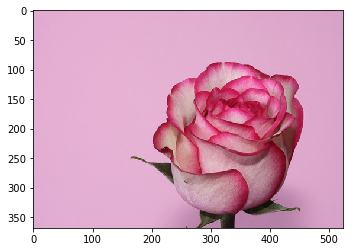

In [19]:
image = imread('rose.jpg');
plt.imshow(image)

#### Finally we got our original image back!

## I decided to test out the other orders to obtain other colors.

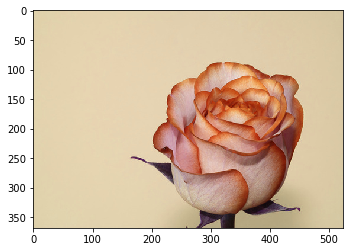

In [20]:
merged_channels = cv2.merge((RedImg,BlueImg,GreenImg))
final_image = cv2.cvtColor(merged_channels, 0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-Orange-0-Rose.png')

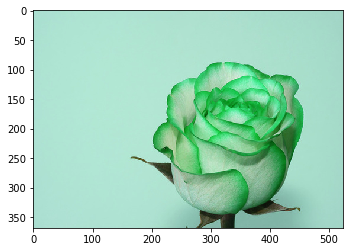

In [21]:
merged_channels = cv2.merge((GreenImg,RedImg,BlueImg))
final_image = cv2.cvtColor(merged_channels, 0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-Green-0-Rose.png')

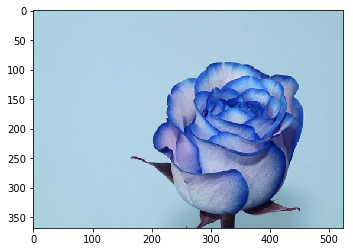

In [22]:
merged_channels = cv2.merge((GreenImg,BlueImg,RedImg))
final_image = cv2.cvtColor(merged_channels, 0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-Blue-Rose.png')

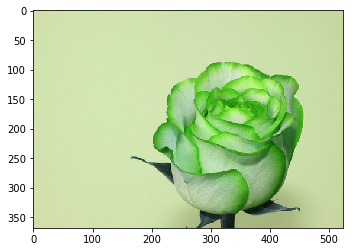

In [23]:
merged_channels = cv2.merge((BlueImg,RedImg,GreenImg))
final_image = cv2.cvtColor(merged_channels, 0)
plt.imshow(final_image, cmap = None, alpha = 1)
plt.savefig('Merge-Lime-Rose.png')

## Resources
https://matplotlib.org/tutorials/colors/colormaps.html

https://matplotlib.org/users/image_tutorial.html

https://matplotlib.org/api/colors_api.html

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html

https://www.mathworks.com/matlabcentral/answers/91036-how-do-i-split-a-color-image-into-its-3-rgb-channels